In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [2]:
import pyspark

In [3]:
import os
print('SPARK_HOME', os.environ.get("SPARK_HOME"))
print('HADOOP_HOME', os.environ.get("HADOOP_HOME"))
print('JAVA_HOME', os.environ.get("JAVA_HOME"))
print(os.environ['PATH'])

SPARK_HOME C:\spark-3.1.2-bin-hadoop3.2\spark-3.1.2-bin-hadoop3.2
HADOOP_HOME C:\winutils
JAVA_HOME C:\Java\jdk-15.0.1
C:\Users\adrien\Anaconda3;C:\Users\adrien\Anaconda3\Library\mingw-w64\bin;C:\Users\adrien\Anaconda3\Library\usr\bin;C:\Users\adrien\Anaconda3\Library\bin;C:\Users\adrien\Anaconda3\Scripts;C:\Users\adrien\Anaconda3\bin;C:\Users\adrien\Anaconda3\condabin;C:\Users\adrien\Anaconda3;C:\Users\adrien\Anaconda3\Library\mingw-w64\bin;C:\Users\adrien\Anaconda3\Library\usr\bin;C:\Users\adrien\Anaconda3\Library\bin;C:\Users\adrien\Anaconda3\Scripts;C:\WINDOWS\System32;C:\Users\adrien\AppData\Local\Microsoft\WindowsApps;C:\spark-3.1.2-bin-hadoop3.2\spark-3.1.2-bin-hadoop3.2\bin;C:\Java\jdk-15.0.1\bin;C:\winutils\bin;C:\Windows\System32;.;C:\Users\adrien\Anaconda3\lib\site-packages\numpy\.libs


In [4]:
## spark imports
from pyspark.sql import Row, SparkSession
from pyspark.sql.functions import *

In [5]:
## standard imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

#Not too sure the following 2 work. This is a TODO
sns.set_color_codes("pastel")
plt.rcParams["figure.figsize"] = [20, 8]

In [7]:
import findspark
findspark.init()

In [8]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Chicago_crime_analysis").config('spark.sql.execution.arrow.pyspark.enabled', True).config('spark.sql.session.timeZone', 'UTC').config('spark.driver.memory','32G').config("spark.driver.cores", '3').getOrCreate()

In [9]:
from pyspark.sql.types import  (StructType, 
                                StructField, 
                                DateType, 
                                BooleanType,
                                DoubleType,
                                IntegerType,
                                StringType,
                               TimestampType)


crimes_schema = StructType([StructField("ID", StringType(), True),
                            StructField("CaseNumber", StringType(), True),
                            StructField("Date", StringType(), True ),
                            StructField("Block", StringType(), True),
                            StructField("IUCR", StringType(), True),
                            StructField("PrimaryType", StringType(), True  ),
                            StructField("Description", StringType(), True ),
                            StructField("LocationDescription", StringType(), True ),
                            StructField("Arrest", BooleanType(), True),
                            StructField("Domestic", BooleanType(), True),
                            StructField("Beat", StringType(), True),
                            StructField("District", StringType(), True),
                            StructField("Ward", StringType(), True),
                            StructField("CommunityArea", StringType(), True),
                            StructField("FBICode", StringType(), True ),
                            StructField("XCoordinate", DoubleType(), True),
                            StructField("YCoordinate", DoubleType(), True ),
                            StructField("Year", IntegerType(), True),
                            StructField("UpdatedOn", DateType(), True ),
                            StructField("Latitude", DoubleType(), True),
                            StructField("Longitude", DoubleType(), True),
                            StructField("Location", StringType(), True )
                            ])

In [10]:
crimes = spark.read.csv("Crimes_-_2001_to_Present.csv",
                       header = True, 
                        schema = crimes_schema)

In [11]:
#Test connexion à notre base
print(" The crimes dataframe has {} records".format(crimes.count()))

 The crimes dataframe has 7393744 records


In [12]:
crimes.show(5)

+--------+----------+--------------------+--------------------+----+-----------+--------------------+-------------------+------+--------+----+--------+----+-------------+-------+-----------+-----------+----+---------+------------+-------------+--------------------+
|      ID|CaseNumber|                Date|               Block|IUCR|PrimaryType|         Description|LocationDescription|Arrest|Domestic|Beat|District|Ward|CommunityArea|FBICode|XCoordinate|YCoordinate|Year|UpdatedOn|    Latitude|    Longitude|            Location|
+--------+----------+--------------------+--------------------+----+-----------+--------------------+-------------------+------+--------+----+--------+----+-------------+-------+-----------+-----------+----+---------+------------+-------------+--------------------+
|10224738|  HY411648|09/05/2015 01:30:...|     043XX S WOOD ST|0486|    BATTERY|DOMESTIC BATTERY ...|          RESIDENCE| false|    true|0924|     009|  12|           61|    08B|  1165074.0|  1875917.0|

## Data Exploration 

In [13]:
# crime types
crime_type_groups = crimes.groupBy('PRIMARYTYPE').count()

#crimes counts
crime_type_counts = crime_type_groups.orderBy('count', ascending=False)

In [14]:
print(crimes.count())

7393744


In [15]:
crimes.columns

['ID',
 'CaseNumber',
 'Date',
 'Block',
 'IUCR',
 'PrimaryType',
 'Description',
 'LocationDescription',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'CommunityArea',
 'FBICode',
 'XCoordinate',
 'YCoordinate',
 'Year',
 'UpdatedOn',
 'Latitude',
 'Longitude',
 'Location']

In [16]:
crimes.printSchema()

root
 |-- ID: string (nullable = true)
 |-- CaseNumber: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- PrimaryType: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- LocationDescription: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- CommunityArea: string (nullable = true)
 |-- FBICode: string (nullable = true)
 |-- XCoordinate: double (nullable = true)
 |-- YCoordinate: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- UpdatedOn: date (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [17]:
crimes.select("Date").show(10, truncate = False)

+----------------------+
|Date                  |
+----------------------+
|09/05/2015 01:30:00 PM|
|09/04/2015 11:30:00 AM|
|09/01/2018 12:01:00 AM|
|09/05/2015 12:45:00 PM|
|09/05/2015 01:00:00 PM|
|09/05/2015 10:55:00 AM|
|09/04/2015 06:00:00 PM|
|09/05/2015 01:00:00 PM|
|09/05/2015 11:30:00 AM|
|05/01/2016 12:25:00 AM|
+----------------------+
only showing top 10 rows



In [18]:
crimes.select(["Latitude","Longitude","Year","XCoordinate","YCoordinate"]).describe().show()

+-------+-------------------+-------------------+------------------+------------------+------------------+
|summary|           Latitude|          Longitude|              Year|       XCoordinate|       YCoordinate|
+-------+-------------------+-------------------+------------------+------------------+------------------+
|  count|            7319778|            7319778|           7393744|           7319778|           7319778|
|   mean| 41.842030789444166| -87.67163948531817|2009.3094727109838|1164561.7554849342| 1885726.857115612|
| stddev|0.08881906428520636|0.06110868728953318|  5.76223290435743|16856.141843546655|32283.198065805034|
|    min|       36.619446395|      -91.686565684|              2001|               0.0|               0.0|
|    max|       42.022910333|      -87.524529378|              2021|         1205119.0|         1951622.0|
+-------+-------------------+-------------------+------------------+------------------+------------------+



In [19]:
crimes.select("PrimaryType").distinct().count()

36

In [20]:
crimes.select("PrimaryType").distinct().show(n = 35)

+--------------------+
|         PrimaryType|
+--------------------+
|OFFENSE INVOLVING...|
|CRIMINAL SEXUAL A...|
|            STALKING|
|PUBLIC PEACE VIOL...|
|           OBSCENITY|
|NON-CRIMINAL (SUB...|
|               ARSON|
|   DOMESTIC VIOLENCE|
|            GAMBLING|
|   CRIMINAL TRESPASS|
|             ASSAULT|
|      NON - CRIMINAL|
|LIQUOR LAW VIOLATION|
| MOTOR VEHICLE THEFT|
|               THEFT|
|             BATTERY|
|             ROBBERY|
|            HOMICIDE|
|           RITUALISM|
|    PUBLIC INDECENCY|
| CRIM SEXUAL ASSAULT|
|   HUMAN TRAFFICKING|
|        INTIMIDATION|
|        PROSTITUTION|
|  DECEPTIVE PRACTICE|
|CONCEALED CARRY L...|
|         SEX OFFENSE|
|     CRIMINAL DAMAGE|
|           NARCOTICS|
|        NON-CRIMINAL|
|       OTHER OFFENSE|
|          KIDNAPPING|
|            BURGLARY|
|   WEAPONS VIOLATION|
|OTHER NARCOTIC VI...|
+--------------------+
only showing top 35 rows



In [21]:
# nombre d'homicides
crimes.where(crimes["PrimaryType"] == "HOMICIDE").count()

11368

In [22]:
crimes.filter((crimes["PrimaryType"] == "ASSAULT") & (crimes["Domestic"] == "True")).count()

106638

In [23]:
#Pour un Primary Type donné, savoir sa description, si c'est en lien avec le domestique et si une arrestation a eu lieu

columns = ['PrimaryType', 'Description', 'Arrest', 'Domestic']

crimes.where((crimes["PrimaryType"] == "HOMICIDE") & (crimes["Arrest"] == "true"))\
                                                        .select(columns).show(10)

+-----------+-------------------+------+--------+
|PrimaryType|        Description|Arrest|Domestic|
+-----------+-------------------+------+--------+
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|  RECKLESS HOMICIDE|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
+-----------+-------------------+------+--------+
only showing top 10 rows



In [24]:
crimes.select(columns).limit(10). show(truncate = True)

+------------------+--------------------+------+--------+
|       PrimaryType|         Description|Arrest|Domestic|
+------------------+--------------------+------+--------+
|           BATTERY|DOMESTIC BATTERY ...| false|    true|
|             THEFT|      POCKET-PICKING| false|   false|
|             THEFT|           OVER $500| false|    true|
|         NARCOTICS|POSS: HEROIN(BRN/...|  true|   false|
|           ASSAULT|              SIMPLE| false|    true|
|          BURGLARY|      FORCIBLE ENTRY| false|   false|
|          BURGLARY|      UNLAWFUL ENTRY| false|   false|
|             THEFT|        RETAIL THEFT|  true|   false|
|           ROBBERY|STRONGARM - NO WE...| false|    true|
|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...| false|   false|
+------------------+--------------------+------+--------+



In [13]:
#latitude max avec la fonction "agg"

lat_max = crimes.agg({"Latitude" : "max"}).collect()[0][0]

print("The maximum latitude values is {}".format(lat_max))

The maximum latitude values is 42.022910333


In [14]:
##Creation d'une nouvelle colomne avec la fonction "withColumn"
#max - valeur actuelle

df = crimes.withColumn("difference_from_max_lat",lat_max - crimes["Latitude"])

In [27]:
df.select(["Latitude", "difference_from_max_lat"]).show(5)

+------------+-----------------------+
|    Latitude|difference_from_max_lat|
+------------+-----------------------+
|41.815117282|     0.2077930509999959|
|41.895080471|    0.12782986199999868|
|        null|                   null|
|41.937405765|     0.0855045679999975|
|41.881903443|    0.14100688999999988|
+------------+-----------------------+
only showing top 5 rows



In [18]:
#Rename a column with withColumnRenamed

df = crimes.withColumnRenamed("Latitude", "Lat")
df.columns

['ID',
 'CaseNumber',
 'Date',
 'Block',
 'IUCR',
 'PrimaryType',
 'Description',
 'LocationDescription',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'CommunityArea',
 'FBICode',
 'XCoordinate',
 'YCoordinate',
 'Year',
 'UpdatedOn',
 'Lat',
 'Longitude',
 'Location']

In [29]:
columns = ['PrimaryType', 'Description', 'Arrest', 'Domestic','Lat']

df.orderBy(df["Lat"].desc()).select(columns).show(10)

+-------------------+--------------------+------+--------+------------+
|        PrimaryType|         Description|Arrest|Domestic|         Lat|
+-------------------+--------------------+------+--------+------------+
|              THEFT|      $500 AND UNDER| false|   false|42.022910333|
|MOTOR VEHICLE THEFT|          AUTOMOBILE| false|   false|42.022878225|
|           BURGLARY|      UNLAWFUL ENTRY| false|   false|42.022709624|
|      OTHER OFFENSE|    PAROLE VIOLATION|  true|   false|42.022671246|
|              THEFT|      POCKET-PICKING| false|   false|42.022671246|
|    CRIMINAL DAMAGE|         TO PROPERTY| false|   false|42.022671246|
|              THEFT|      $500 AND UNDER| false|   false|42.022671246|
|    CRIMINAL DAMAGE|          TO VEHICLE| false|   false|42.022653914|
|          NARCOTICS|POSS: CANNABIS 30...|  true|   false|42.022644813|
|            BATTERY|              SIMPLE| false|    true|42.022644813|
+-------------------+--------------------+------+--------+------

## Calculate Statistics with Pyspark Function

In [30]:
from pyspark.sql.functions import mean
df.select(mean("Lat")).alias("Mean Latitude").show()

+------------------+
|          avg(Lat)|
+------------------+
|41.842030789444166|
+------------------+



In [31]:
#Calcul de moyenne avec avg fonction

df.agg({"Lat":"avg"}).show()

+------------------+
|          avg(Lat)|
+------------------+
|41.842030789444166|
+------------------+



In [32]:
#Max et min des coordonnées

from pyspark.sql.functions import max,min

df.select(max("Xcoordinate"),min("Xcoordinate")).show()

+----------------+----------------+
|max(Xcoordinate)|min(Xcoordinate)|
+----------------+----------------+
|       1205119.0|             0.0|
+----------------+----------------+



In [33]:
#Quel pourcentage de crimes sont domestiques

df.filter(df["Domestic"]==True).count()/df.count() * 100

13.599334788978357

In [34]:
#Corrélation entre latitude et Y coordonnées

from pyspark.sql.functions import corr
df.select(corr("Lat","Ycoordinate")).show()

+----------------------+
|corr(Lat, Ycoordinate)|
+----------------------+
|    0.9999937627818188|
+----------------------+



In [35]:
#Nombre de crimes par an

df.groupBy("Year").count().show()

+----+------+
|Year| count|
+----+------+
|2003|475967|
|2007|437061|
|2018|268443|
|2015|264571|
|2006|448150|
|2013|307376|
|2014|275646|
|2019|260790|
|2004|469407|
|2020|211231|
|2012|336194|
|2009|392788|
|2016|269608|
|2001|485812|
|2005|453754|
|2010|370435|
|2011|351914|
|2008|427131|
|2017|268845|
|2002|486773|
+----+------+
only showing top 20 rows



In [36]:
#Visualisation du nombre total de crimes par an

count = [item[1] for item in df.groupBy("Year").count().collect()]
year = [item[0] for item in df.groupBy("Year").count().collect()]

number_of_crimes_per_year = {"count":count, "year" : year}

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

number_of_crimes_per_year = pd.DataFrame(number_of_crimes_per_year)

number_of_crimes_per_year.head()

,count,year
0,475967,2003
1,437061,2007
2,268443,2018
3,264571,2015
4,448150,2006


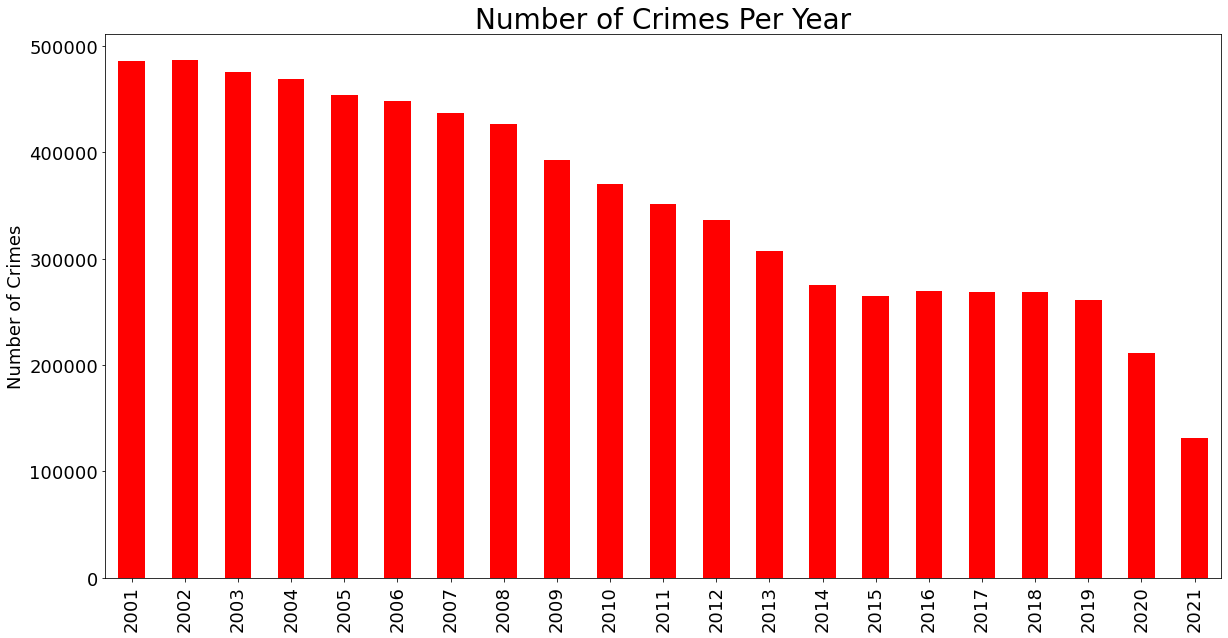

In [37]:
number_of_crimes_per_year = number_of_crimes_per_year.sort_values(by = "year")

number_of_crimes_per_year.plot(figsize = (20,10), kind = "bar", color = "red",
                               x = "year", y = "count", legend = False)

plt.xlabel("", fontsize = 18)
plt.ylabel("Number of Crimes", fontsize = 18)
plt.title("Number of Crimes Per Year", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

In [20]:
import datetime
from pyspark.sql.functions import *

df.select(min('date').alias('first_record_date'), max('date').alias('latest_record_date')).show(truncate=False)

+----------------------+----------------------+
|first_record_date     |latest_record_date    |
+----------------------+----------------------+
|01/01/2001 01:00:00 AM|12/31/2020 12:55:00 AM|
+----------------------+----------------------+



In [13]:
df = df.withColumn('date_time', to_timestamp('date', 'MM/dd/yyyy hh:mm:ss a'))\
       .withColumn('month', trunc('date_time', 'YYYY')) #adding a month column to be able to view stats on a monthly basis

In [14]:
df.select(['date','date_time', 'month'])\
  .show(n=2, truncate=False)

+----------------------+-------------------+----------+
|date                  |date_time          |month     |
+----------------------+-------------------+----------+
|09/05/2015 01:30:00 PM|2015-09-05 13:30:00|2015-01-01|
|09/04/2015 11:30:00 AM|2015-09-04 11:30:00|2015-01-01|
+----------------------+-------------------+----------+
only showing top 2 rows



In [16]:
#Primary type and arrest

# crime types et arrest sur les x dernières années:
type_arrest_date = df.groupBy(['arrest', 'month'])\
                     .count()\
                     .orderBy(['month', 'count'], ascending=[True, False])
print()
type_arrest_date.show(3, truncate=False)


+------+----------+------+
|arrest|month     |count |
+------+----------+------+
|false |2001-01-01|343891|
|true  |2001-01-01|141921|
|false |2002-01-01|345213|
+------+----------+------+
only showing top 3 rows



In [17]:
import datetime

datetime.datetime.now()
datetime.datetime.strftime(datetime.datetime.now(), '%H')

'14'

#
type_arrest_pddf = type_arrest_date.toPandas()
type_arrest_pddf

,arrest,month,count
0,False,2001-01-01,343891
1,True,2001-01-01,141921
2,False,2002-01-01,345213
3,True,2002-01-01,141560
4,False,2003-01-01,334387
5,True,2003-01-01,141580
6,False,2004-01-01,324713
7,True,2004-01-01,144694
8,False,2005-01-01,312840
9,True,2005-01-01,140914


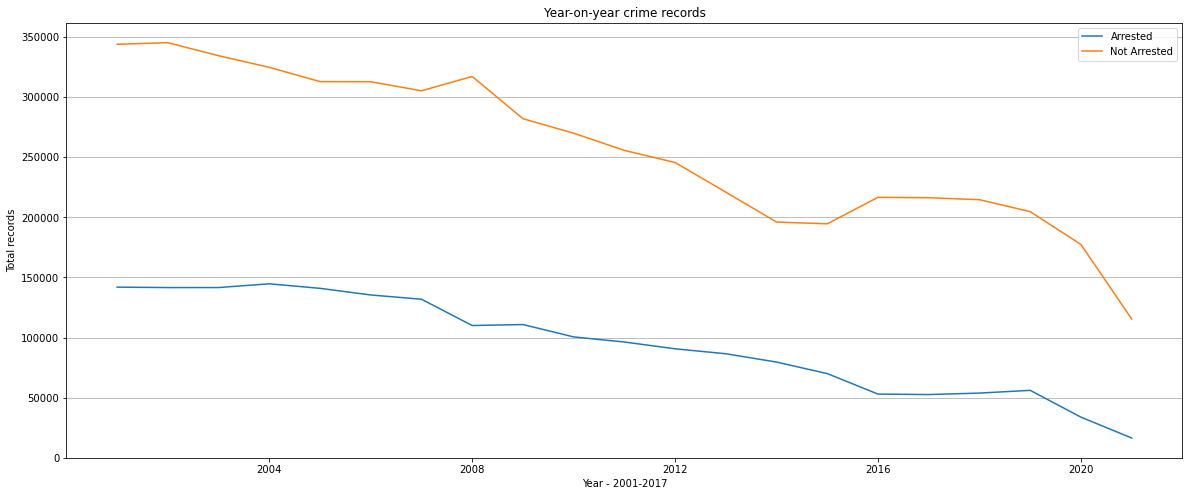

In [18]:
t = type_arrest_pddf['count'] - 20 # np.arange(0.0, 2.0, 0.01)
s = type_arrest_pddf['month']

arrested = type_arrest_pddf[type_arrest_pddf['arrest'] == True]
not_arrested = type_arrest_pddf[type_arrest_pddf['arrest'] == False]


fig, ax = plt.subplots()
ax.plot(arrested['month'], arrested['count'], label='Arrested')
ax.plot(not_arrested['month'], not_arrested['count'], label='Not Arrested')

ax.set(xlabel='Year - 2001-2017', ylabel='Total records',
       title='Year-on-year crime records')
ax.grid(b=True, which='both', axis='y')
ax.legend()

### Quel jour dans la semaine est le plus criminel

In [18]:
# Extraction des heures
df_hour = df.withColumn('hour', hour(df['date_time']))
df_hour.show()

+--------+----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+-------------+-------+-----------+-----------+----+---------+------------+-------------+--------------------+-------------------+----------+----+
|      ID|CaseNumber|                Date|               Block|IUCR|       PrimaryType|         Description| LocationDescription|Arrest|Domestic|Beat|District|Ward|CommunityArea|FBICode|XCoordinate|YCoordinate|Year|UpdatedOn|         Lat|    Longitude|            Location|          date_time|     month|hour|
+--------+----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+-------------+-------+-----------+-----------+----+---------+------------+-------------+--------------------+-------------------+----------+----+
|10224738|  HY411648|09/05/2015 01:30:...|     043XX S WOOD ST|0486|  

In [20]:
# Data frame with le nombre de crimes par heure de la journée
hourly_count = df_hour.groupBy(['PrimaryType', 'hour']).count().cache()
hourly_total_count = hourly_count.groupBy('hour').sum('count')
hourly_total_count.show()

+----+----------+
|hour|sum(count)|
+----+----------+
|  12|    423976|
|  22|    399851|
|   1|    234472|
|  13|    352092|
|   6|    117533|
|  16|    372889|
|   3|    159977|
|  20|    417641|
|   5|    100296|
|  19|    418705|
|  15|    393457|
|   9|    319428|
|  17|    379127|
|   4|    120407|
|   8|    250030|
|  23|    331545|
|   7|    168082|
|  10|    312892|
|  21|    405892|
|  11|    328032|
+----+----------+
only showing top 20 rows



In [47]:
hourly_count_pddf = hourly_total_count.toPandas()
hourly_count_pddf.sort_index(axis = 0, ascending = True)
hourly_count_pddf.sort_values(by='hour')

,hour,sum(count)
22,0,411484
2,1,234472
21,2,196235
6,3,159977
13,4,120407
8,5,100296
4,6,117533
16,7,168082
14,8,250030
11,9,319428


### Nombre de crimes

In [19]:
df_dates = df_hour.withColumn('week_day', dayofweek(df_hour['date_time']))\
                 .withColumn('year_month', month(df_hour['date_time']))\
                 .withColumn('month_day', dayofmonth(df_hour['date_time']))\
                 .withColumn('date_number', datediff(df['date_time'], to_date(lit('2001-01-01'), format='yyyy-MM-dd')))\
                 .cache()

In [50]:
df_dates.select(['date', 'month', 'hour', 'week_day', 'year', 'year_month', 'month_day', 'date_number']).show(20, truncate=False)

+----------------------+----------+----+--------+----+----------+---------+-----------+
|date                  |month     |hour|week_day|year|year_month|month_day|date_number|
+----------------------+----------+----+--------+----+----------+---------+-----------+
|09/05/2015 01:30:00 PM|2015-01-01|13  |7       |2015|9         |5        |5360       |
|09/04/2015 11:30:00 AM|2015-01-01|11  |6       |2015|9         |4        |5359       |
|09/01/2018 12:01:00 AM|2018-01-01|0   |7       |2018|9         |1        |6452       |
|09/05/2015 12:45:00 PM|2015-01-01|12  |7       |2015|9         |5        |5360       |
|09/05/2015 01:00:00 PM|2015-01-01|13  |7       |2015|9         |5        |5360       |
|09/05/2015 10:55:00 AM|2015-01-01|10  |7       |2015|9         |5        |5360       |
|09/04/2015 06:00:00 PM|2015-01-01|18  |6       |2015|9         |4        |5359       |
|09/05/2015 01:00:00 PM|2015-01-01|13  |7       |2015|9         |5        |5360       |
|09/05/2015 11:30:00 AM|2015-01-

In [52]:
week_day_crime_counts = df_dates.groupBy('week_day').count()

In [53]:
week_day_crime_counts_pddf = week_day_crime_counts.toPandas()
week_day_crime_counts_pddf.sort_values(by='week_day')

,week_day,count
0,1,1004005
6,2,1044843
2,3,1057584
4,4,1063583
3,5,1053116
1,6,1112018
5,7,1058595


<AxesSubplot:xlabel='week_day', ylabel='count'>

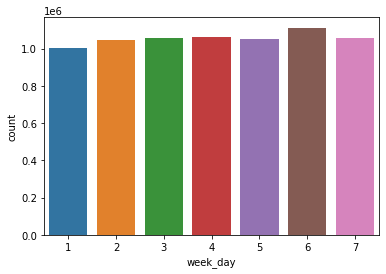

In [54]:
sns.barplot(data=week_day_crime_counts_pddf, x='week_day', y='count')
#Un nombre de crimes plus important le samedi ....

### Moyenne Mobile Spark par an

In [15]:
from pyspark.sql.window import Window

from pyspark.sql import functions as F

movAvg = df.withColumn("movingAverage", F.avg("ID").over( Window.partitionBy("Year").rowsBetween(-1,1)) )

In [16]:
movAvg

DataFrame[ID: string, CaseNumber: string, Date: string, Block: string, IUCR: string, PrimaryType: string, Description: string, LocationDescription: string, Arrest: boolean, Domestic: boolean, Beat: string, District: string, Ward: string, CommunityArea: string, FBICode: string, XCoordinate: double, YCoordinate: double, Year: int, UpdatedOn: date, Latitude: double, Longitude: double, Location: string, difference_from_max_lat: double, movingAverage: double]

In [17]:
movAvg.show(1, False)

+--------+----------+----------------------+--------------------+----+-----------+---------------------+-------------------+------+--------+----+--------+----+-------------+-------+-----------+-----------+----+---------+--------+---------+--------+-----------------------+-------------+
|ID      |CaseNumber|Date                  |Block               |IUCR|PrimaryType|Description          |LocationDescription|Arrest|Domestic|Beat|District|Ward|CommunityArea|FBICode|XCoordinate|YCoordinate|Year|UpdatedOn|Latitude|Longitude|Location|difference_from_max_lat|movingAverage|
+--------+----------+----------------------+--------------------+----+-----------+---------------------+-------------------+------+--------+----+--------+----+-------------+-------+-----------+-----------+----+---------+--------+---------+--------+-----------------------+-------------+
|11042905|JA374476  |01/01/2003 12:01:00 AM|056XX S ARTESIAN AVE|1563|SEX OFFENSE|CRIMINAL SEXUAL ABUSE|RESIDENCE          |false |false   

In [40]:
#Ou ont lieux les cries ....

crimes.groupBy("LocationDescription").count().show()

+--------------------+------+
| LocationDescription| count|
+--------------------+------+
|   RAILROAD PROPERTY|    14|
|SCHOOL - PRIVATE ...|   132|
|AIRPORT TERMINAL ...|  1952|
|VEHICLE - COMMERCIAL|   220|
|EXPRESSWAY EMBANK...|     1|
|POLICE FACILITY/V...| 18581|
|RESIDENCE - YARD ...|  5078|
|               MOTEL|     6|
|CHA PARKING LOT /...|   669|
|            SIDEWALK|709201|
|AIRPORT TERMINAL ...|    98|
|PUBLIC GRAMMAR SC...|     1|
|OTHER RAILROAD PR...|   185|
|CTA GARAGE / OTHE...| 10279|
|            CAR WASH|  3092|
|   TRUCKING TERMINAL|     1|
|    AIRPORT/AIRCRAFT| 16213|
|            HOSPITAL|    12|
|MEDICAL/DENTAL OF...|  7432|
|    FEDERAL BUILDING|   886|
+--------------------+------+
only showing top 20 rows



In [41]:
crime_location  = crimes.groupBy("LocationDescription").count().collect()
location = [item[0] for item in crime_location]
count = [item[1] for item in crime_location]
crime_location = {"location" : location, "count": count}
crime_location = pd.DataFrame(crime_location)
crime_location = crime_location.sort_values(by = "count", ascending  = False)
crime_location.iloc[:5]

,location,count
72,STREET,1918700
121,RESIDENCE,1254780
154,APARTMENT,803529
9,SIDEWALK,709201
155,OTHER,270072


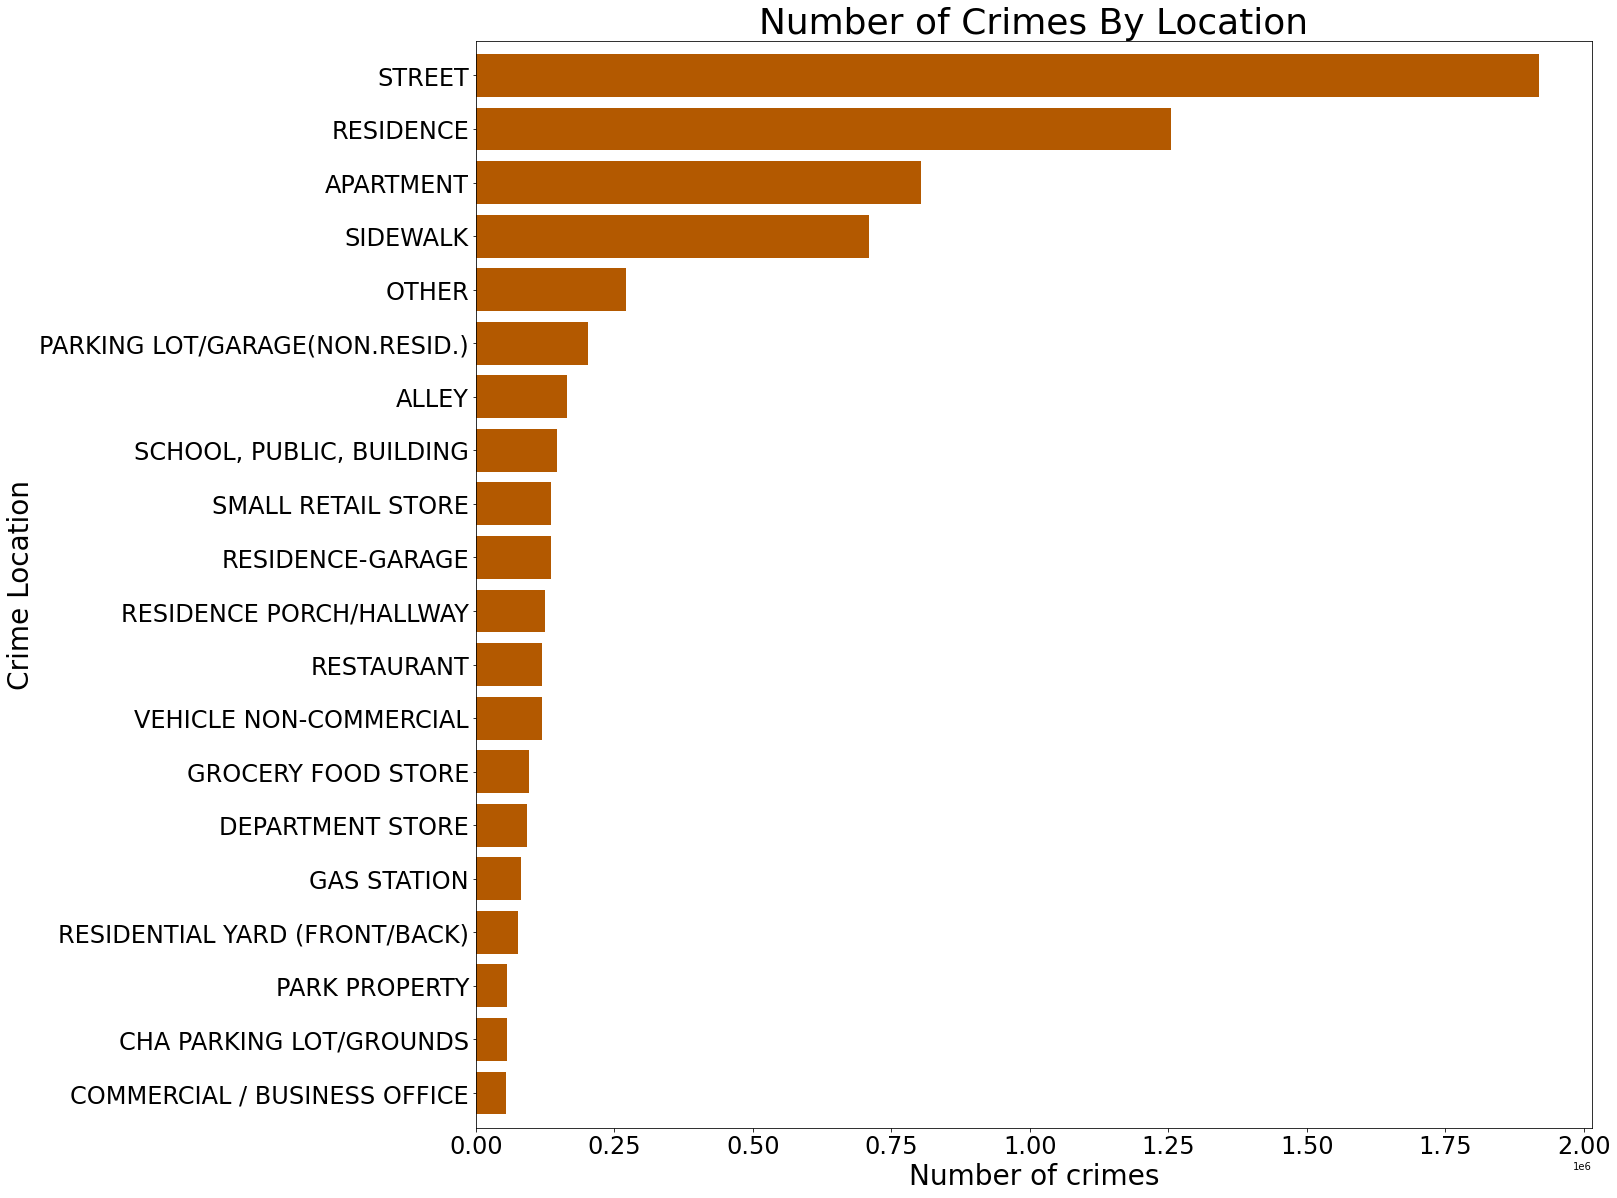

In [42]:
crime_location = crime_location.iloc[:20]

myplot = crime_location .plot(figsize = (20,20), kind = "barh", color = "#b35900", width = 0.8,
                               x = "location", y = "count", legend = False)

myplot.invert_yaxis()

plt.xlabel("Number of crimes", fontsize = 28)
plt.ylabel("Crime Location", fontsize = 28)
plt.title("Number of Crimes By Location", fontsize = 36)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()

In [43]:
df.show(4)

+--------+----------+--------------------+--------------------+----+-----------+--------------------+-------------------+------+--------+----+--------+----+-------------+-------+-----------+-----------+----+---------+------------+-------------+--------------------+
|      ID|CaseNumber|                Date|               Block|IUCR|PrimaryType|         Description|LocationDescription|Arrest|Domestic|Beat|District|Ward|CommunityArea|FBICode|XCoordinate|YCoordinate|Year|UpdatedOn|         Lat|    Longitude|            Location|
+--------+----------+--------------------+--------------------+----+-----------+--------------------+-------------------+------+--------+----+--------+----+-------------+-------+-----------+-----------+----+---------+------------+-------------+--------------------+
|10224738|  HY411648|09/05/2015 01:30:...|     043XX S WOOD ST|0486|    BATTERY|DOMESTIC BATTERY ...|          RESIDENCE| false|    true|0924|     009|  12|           61|    08B|  1165074.0|  1875917.0|

In [44]:
import datetime
from pyspark.sql.functions import *

df.select(min('Date').alias('first_record_date'), max('Date').alias('latest_record_date')).show(truncate=False)

+----------------------+----------------------+
|first_record_date     |latest_record_date    |
+----------------------+----------------------+
|01/01/2001 01:00:00 AM|12/31/2020 12:55:00 AM|
+----------------------+----------------------+



In [45]:
df = df.withColumn('date_time', to_timestamp('Date', 'MM/dd/yyyy hh:mm:ss a'))\
       .withColumn('month', trunc('date_time', 'YYYY')) #adding a month column to be able to view stats on a monthly basis

df.select(['date','date_time', 'month'])\
  .show(n=2, truncate=False)

+----------------------+-------------------+----------+
|date                  |date_time          |month     |
+----------------------+-------------------+----------+
|09/05/2015 01:30:00 PM|2015-09-05 13:30:00|2015-01-01|
|09/04/2015 11:30:00 AM|2015-09-04 11:30:00|2015-01-01|
+----------------------+-------------------+----------+
only showing top 2 rows



In [46]:
#Primary type and arrest

# crime types and arrest sur les dernières années :
type_arrest_date = df.groupBy(['arrest', 'month'])\
                     .count()\
                     .orderBy(['month', 'count'], ascending=[True, False])
print()
type_arrest_date.show(3, truncate=False)


+------+----------+------+
|arrest|month     |count |
+------+----------+------+
|false |2001-01-01|343891|
|true  |2001-01-01|141921|
|false |2002-01-01|345213|
+------+----------+------+
only showing top 3 rows



### Community area names 

In [84]:
#Chicago a 77 community areas. 

df_dates_community_areas = df_dates.na.drop(subset=['CommunityArea']).groupBy('CommunityArea').count()

In [85]:
# Quel sont les 10 quartiers qui ont le plus d'enregistrements de crimes ?
df_dates_community_areas.orderBy('count', ascending=False).show(10)

+-------------+------+
|CommunityArea| count|
+-------------+------+
|           25|428207|
|            8|235467|
|           43|222852|
|           23|213749|
|           28|201722|
|           29|198554|
|           24|198445|
|           67|197378|
|           71|192761|
|           49|181038|
+-------------+------+
only showing top 10 rows

